In [1]:
import numpy as np
from scipy.stats import chi2
observed = np.array([115, 47, 41, 101, 200, 96])
expected = np.array([100, 100, 100, 100, 100, 100])
chi2_stat = np.sum((observed - expected)**2 / expected)
df = len(observed) - 1
critical_value = chi2.ppf(0.90, df)
p_value = 1 - chi2.cdf(chi2_stat, df)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"Critical Value at 10% significance level: {critical_value}")
print(f"p-value: {p_value}")
# Conclusion
if chi2_stat < critical_value:
    print("Fail to reject the null hypothesis: The die is unbiased.")
else:
    print("Reject the null hypothesis: The die is biased.")

Chi-squared Statistic: 165.32000000000002
Critical Value at 10% significance level: 9.236356899781121
p-value: 0.0
Reject the null hypothesis: The die is biased.


In [2]:
#Confidence Interval
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random
population = np.arange(1, 10**4) #random population
pop_mean = np.mean(population)
def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = random.sample(list(population), sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample), 
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
            
    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(15,5))
    
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()



for ci of 0.85 sample_size 1000
actual mean : 100030.9097
mean of samples : 100193.39956
confidence interval : 100030.9097 +- 59.92658094789176


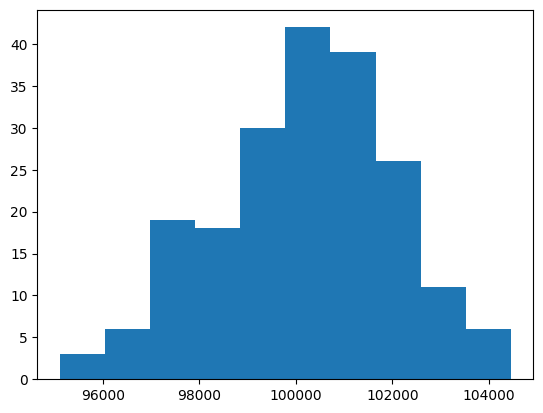


for ci of 0.85 sample_size 1000
actual mean : 100030.9097
mean of samples : 100128.87550999998
confidence interval : 100030.9097 +- 57.02929529057215


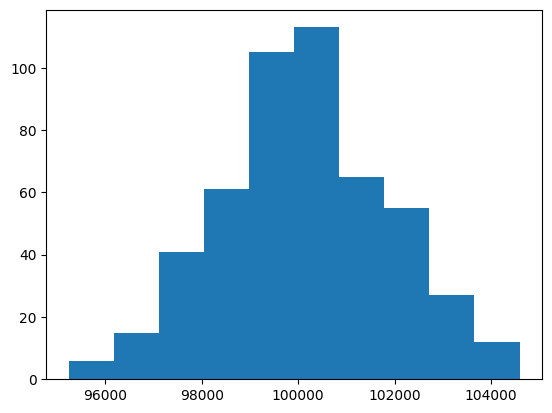


for ci of 0.85 sample_size 1000
actual mean : 100030.9097
mean of samples : 99911.440352
confidence interval : 100030.9097 +- 58.055008404414814


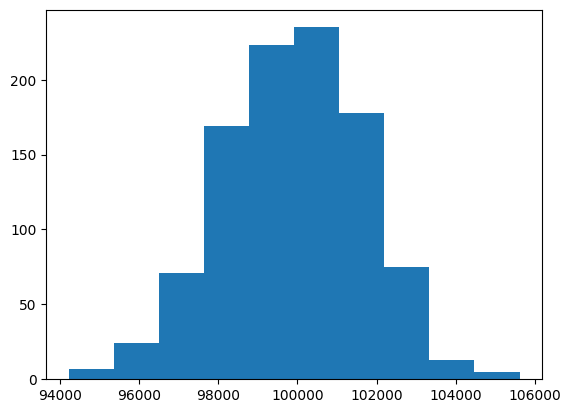

In [3]:
#CI for population where 85% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

#parameters....population, required_CI, sample_size, no_of_samples
def CI(pop, ci, samp_size, no_of_samples):
    print("\nfor ci of", ci, "sample_size", samp_size)
    pop_mean = np.mean(pop)
    print('actual mean :',pop_mean)
    
    #calculation of same using CI
    samp_means = []      #mean of all the samples 
    for i in range(no_of_samples):
        samp_means.append(np.mean(sample(pop, samp_size)))
    
    #calculation of interval
    print('mean of samples :', np.mean(samp_means))
    pop_stdev = np.std(samp_means) / math.sqrt(samp_size)
    z = st.norm.ppf(ci)
    print("confidence interval :", pop_mean, "+-", z*pop_stdev)
    plt.hist(samp_means)
    plt.show()
    
pop = sample(range(1, 2*10**5), 10**4)  #random population generation
#varying no_of_samples
CI(pop, 0.85, 1000, 200)
CI(pop, 0.85, 1000, 500)
CI(pop, 0.85, 1000, 1000)
#shape of the curve becomes normal as the no of samples increases(samp_mean better approx of actual mean)
